In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import numpy as np

# Use this script to gather results inside one subdirectory and plot them. Be sure to always to always start the script from the directory where the '0io', '1io', '2io' etc. directories are located.

In [23]:

# Define the base directory where the CSV files are located
base_dir = '/home/fott/UniPPS/projekt/messungen/both/r2b5/12m12h/n1/0io'  # Replace this with the actual path

# Initialize a list to hold the total averages and their corresponding process counts
data = []

# Iterate over the folders for IO and checkpoints
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    file_data = pd.DataFrame()
    
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Iterate over files in the directory
        for filename in os.listdir(folder_path):
            if filename.endswith('.csv'):
                csv_path = os.path.join(folder_path, filename)
                
                # Read the CSV file
                try:
                    df = pd.read_csv(csv_path, index_col=0)

                    filetype = 'io' if 'io' in filename else 'checkpoints' if 'checkpoints' in filename else 'workers'

                    total_avg = df.loc['total', 'total avg (s)'] if filename == 'timer_report_workers.csv' else 0
                    wrt_output_avg = df.loc['wrt_output', 'total avg (s)'] if not filename == 'timer_report_checkpoints.csv' else 0
                    wrt_restart_avg = df.loc['write_restart', 'total avg (s)'] if not filename == 'timer_report_io.csv' else 0

                    time_data = pd.Series((total_avg, wrt_output_avg, wrt_restart_avg), index=['total_avg', 'wrt_output_avg', 'wrt_restart_avg'], name=filetype)

                    # Append the value with the number of processes (extracted from the folder name)
                    file_data = pd.concat((file_data, time_data.to_frame().T), ignore_index=False)
                except Exception as e:
                    print(f'Error reading {csv_path}: {e}')

        data.append((re.sub(r'[a-z]+', '', folder), file_data))

        print(file_data.head())

             total_avg  wrt_output_avg  wrt_restart_avg
workers       1912.884         497.796            2.314
checkpoints      0.000           0.000           33.052
             total_avg  wrt_output_avg  wrt_restart_avg
workers       1908.706         506.298            1.590
checkpoints      0.000           0.000           30.629
             total_avg  wrt_output_avg  wrt_restart_avg
workers       1860.603         484.938            1.525
checkpoints      0.000           0.000           32.364


In [24]:
# Create a DataFrame from the collected data
results = pd.DataFrame(data, columns=['# processes', 'data'])

# Convert the 'Processes' to a categorical variable for proper sorting in the plot
results.sort_values('# processes', inplace=True, key=lambda x: x.astype(int))
results['# processes'] = results['# processes'].astype(str)

# results.head()
print(results['data'][0])
# print(data.head())

             total_avg  wrt_output_avg  wrt_restart_avg
workers       1912.884         497.796            2.314
checkpoints      0.000           0.000           33.052


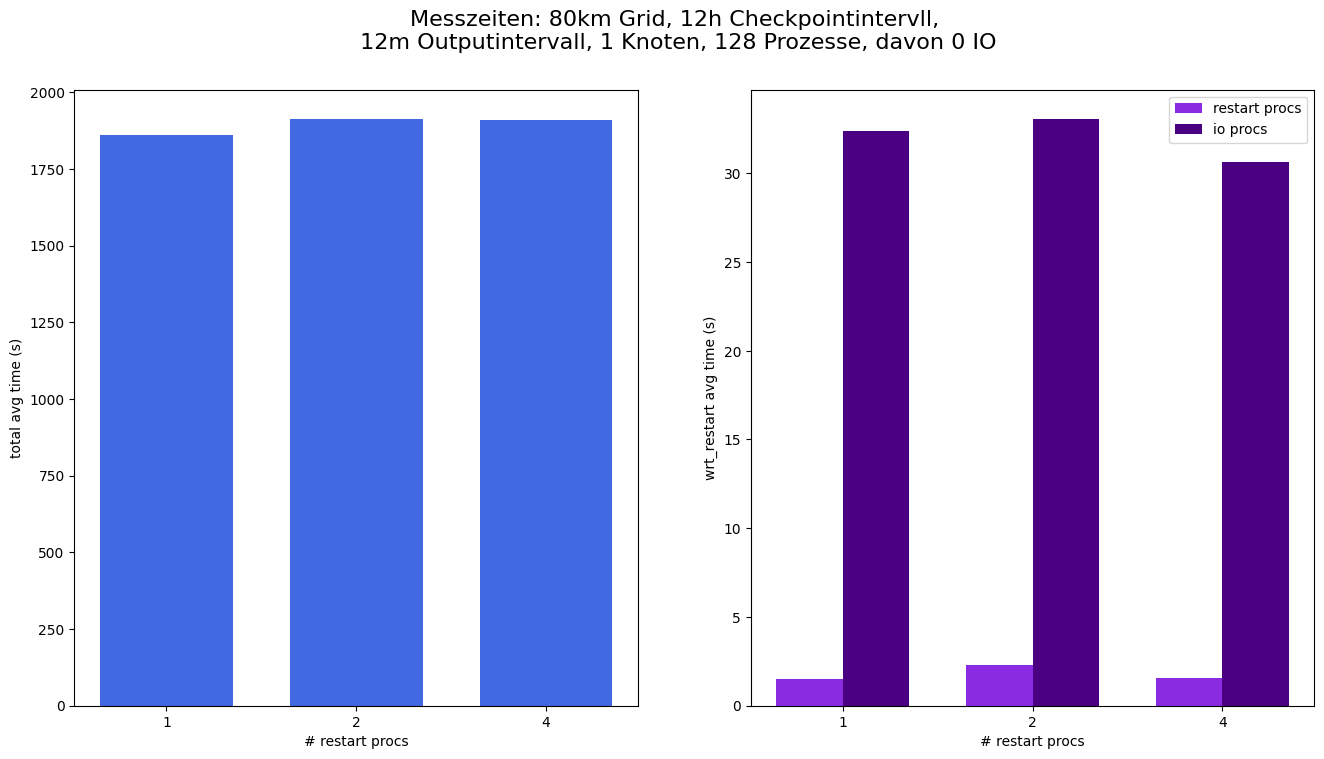

In [25]:

# Plotting the data

total = results['data'].apply(lambda x: x['total_avg']).fillna(0)
# print(total)
wrt_output = results['data'].apply(lambda x: x['wrt_output_avg']).fillna(0)
# print(wrt_output)
wrt_restart = results['data'].apply(lambda x: x['wrt_restart_avg']).fillna(0)
# print(wrt_restart)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
bar_width = 0.35

fig.suptitle('Messzeiten: 80km Grid, 12h Checkpointintervll,\n 12m Outputintervall, 1 Knoten, 128 Prozesse, davon 0 IO', fontsize=16)

ax[0].bar(results['# processes'], total['workers'], color='royalblue', width=bar_width*2)
ax[0].set_xlabel('# restart procs')
ax[0].set_ylabel('total avg time (s)')

x = np.arange(len(results['# processes']))

# ax[1].bar(x - bar_width/2, wrt_output['workers'], color='deepskyblue', width=bar_width)
# ax[1].bar(x + bar_width/2 , wrt_output['io'], color='turquoise', width=bar_width)
# ax[1].legend(['worker procs', 'io procs'])
# ax[1].set_xticks(x, results['# processes'])
# ax[1].set_xlabel('# restart procs')
# ax[1].set_ylabel('wrt_output avg time (s)')

# ax[2].bar(x - bar_width/2, wrt_restart['workers'], color='blueviolet', width=bar_width)
# ax[2].bar(x + bar_width/2 , wrt_restart['checkpoints'], color='indigo', width=bar_width)
# ax[2].legend(['restart procs', 'io procs'])
# ax[2].set_xticks(x, results['# processes'])
# ax[2].set_xlabel('# restart procs')
# ax[2].set_ylabel('wrt_restart avg time (s)')

ax[1].bar(x - bar_width/2, wrt_restart['workers'], color='blueviolet', width=bar_width)
ax[1].bar(x + bar_width/2 , wrt_restart['checkpoints'], color='indigo', width=bar_width)
ax[1].legend(['restart procs', 'io procs'])
ax[1].set_xticks(x, results['# processes'])
ax[1].set_xlabel('# restart procs')
ax[1].set_ylabel('wrt_restart avg time (s)')


plt.savefig(base_dir + 'messzeiten.png', format='png', dpi=300, )

plt.show()